In [101]:
# Install TensorFlow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD


2.2.0


In [0]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
# Get data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-05-12 17:30:51--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.5’

moore.csv.5         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-05-12 17:30:51 (47.7 MB/s) - ‘moore.csv.5’ saved [2302/2302]



# Exploratory Data Analysis

In [0]:
data = pd.read_csv('moore.csv', header=None).values # Convert to numpy array

In [0]:
X = data[:,0].reshape(-1, 1) # Dat needs to be N x D instead of vector
Y = data[:,1] # Extract vector of targets

In [106]:
X.shape # N x D matrix, where D = 1

(162, 1)

In [107]:
Y.shape # N size vector, 1 target per data point

(162,)

Text(0.5, 0, 'Year')

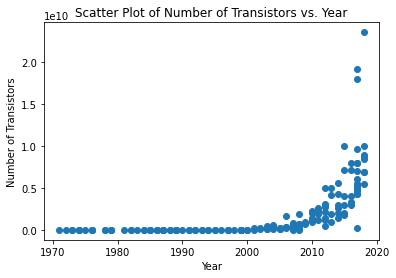

In [108]:
plt.scatter(X, Y)
plt.title("Scatter Plot of Number of Transistors vs. Year")
plt.ylabel("Number of Transistors")
plt.xlabel("Year")

# Data Preprocessing

Text(0.5, 0, 'Year')

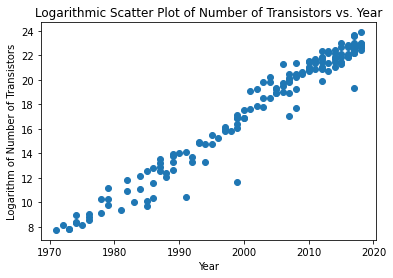

In [109]:
Y = np.log(Y)
plt.scatter(X, Y)
plt.title("Logarithmic Scatter Plot of Number of Transistors vs. Year")
plt.ylabel("Logarithm of Number of Transistors")
plt.xlabel("Year")

## Scaling Data

In [0]:
# Use mean to scale data
X = X - X.mean()

# Building Model

In [0]:
# Create layers
i = Input(shape=(1,)) # Shape of input data is 1-Dimensional numpy array.
x = Dense(1)(i) # No activation function because we are doing linear regression

model = Model(i, x)

# Compile model
learning_rate = 0.001
momentum = 0.9
model.compile(optimizer=SGD(learning_rate, momentum),
              loss='mse')

# Learning rate scheduler
# As we epoch becomes higher, decrease learning rate
def schedule(epoch):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = LearningRateScheduler(schedule)



In [112]:
r = model.fit(X, Y,
              epochs = 200,
              callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 337.5480 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 495.0056 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 396.7350 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 220.1946 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 209.8395 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 150.1212 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 98.2194 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 69.5245 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 54.1242 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 46.7872 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 3

# Model Evaluation

Text(0.5, 0, 'Epoch')

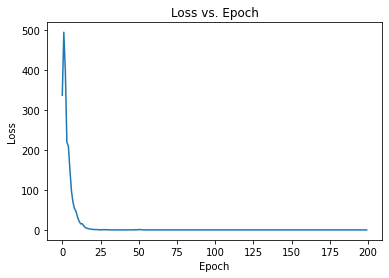

In [118]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.title("Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')

## Prove Moore's law right

In [124]:
# Get weights of first Dense layer
print("Weights: ", model.layers[1])
print("Weights and biases: ", model.layers[1].get_weights())

Weights:  <tensorflow.python.keras.layers.core.Dense object at 0x7f5551578da0>
Weights and biases:  [array([[0.34610352]], dtype=float32), array([17.766237], dtype=float32)]


In [132]:
a = model.layers[1].get_weights()[0][0][0]
b = model.layers[1].get_weights()[1][0]
print("Slope of line: ", a)
print("Bias of line: ", b)

Slope of line:  0.34610352
Bias of line:  17.766237


In [139]:
print("Time for transistors to double: ", np.log(2) / a)

Time for transistors to double:  2.0027163611614163


## Making Predictions

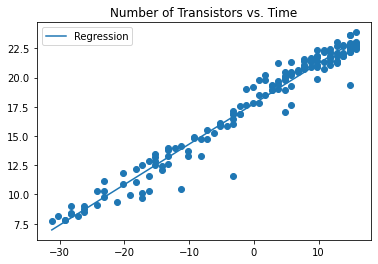

In [145]:
Yhat = model.predict(X)
plt.plot(X, Yhat, label='Regression')
plt.scatter(X, Y)
plt.title("Number of Transistors vs. Time")
plt.legend()

In [0]:
# The regression line fits the data


In [149]:
print(Yhat.shape)

(162, 1)


In [151]:
# Manual Calculations
Yhat2 = np.dot(a, X) + b
np.allclose(Yhat, Yhat2)

True

In [0]:
# So it model did indeed create a linear equation